# 영문분석 + 워드클라우드

In [3]:
#1. 데이터 준비

In [53]:
import pandas as pd
import glob
import re

In [74]:
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [55]:
#데이터 조합, 파일 병합하기
all_files = glob.glob('8_data/myCabinetExcelData*.xls')  #10개의 파일 하나로 병합
all_files

['8_data\\myCabinetExcelData (1).xls',
 '8_data\\myCabinetExcelData (2).xls',
 '8_data\\myCabinetExcelData (3).xls',
 '8_data\\myCabinetExcelData (4).xls',
 '8_data\\myCabinetExcelData (5).xls',
 '8_data\\myCabinetExcelData (6).xls',
 '8_data\\myCabinetExcelData (7).xls',
 '8_data\\myCabinetExcelData (8).xls',
 '8_data\\myCabinetExcelData (9).xls',
 '8_data\\myCabinetExcelData.xls']

In [56]:
all_files_data = []  #저장할 리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]  #내용 확인

,번호,제목,저자,출판사,출판일
0,1,Call for Special Issue Papers: Big Scientific ...,"Anaraki, Farhad Pourkamali; Hariri-Ardebili, M...",Mary Ann Leibert,2021
1,2,Big Data on Robotics,unknown,Mary Ann Leibert,2016
2,3,Big Data in Business: A Bibliometric Analysis ...,"Nobanee, Haitham",Mary Ann Leibert,2020
3,4,Exploiting Reused-Based Sharing Work Opportuni...,"Sahal, Radhya; Khafagy, Mohammed H.; Omara, Fa...",Mary Ann Leibert,2021
4,5,"Big Data, Efficient Markets, and the End of Da...","Urbaczewski, Andrew; Elmore, Ryan",Mary Ann Leibert,2018
...,...,...,...,...,...
95,96,A five-layer architecture for big data process...,"Zhu, Julie Yixuan; Tang, Bo; Li, Victor O.K.",Inderscience,2019
96,97,AlgorithmSeer: A System for Extracting and Sea...,"Tuarob, S.; Bhatia, S.; Mitra, P.; Giles, C. L.",unknown,2016
97,98,Petuum: A New Platform for Distributed Machine...,"Xing, E. P.; Ho, Q.; Dai, W.; Kim, J. K.; Wei,...",unknown,2015
98,99,Deduplication on Encrypted Big Data in Cloud,"Yan, Z.; Ding, W.; Yu, X.; Zhu, H.; Deng, R. H.",unknown,2016


In [57]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)
all_files_data_concat

,번호,제목,저자,출판사,출판일
0,1,Call for Special Issue Papers: Big Scientific ...,"Anaraki, Farhad Pourkamali; Hariri-Ardebili, M...",Mary Ann Leibert,2021
1,2,Big Data on Robotics,unknown,Mary Ann Leibert,2016
2,3,Big Data in Business: A Bibliometric Analysis ...,"Nobanee, Haitham",Mary Ann Leibert,2020
3,4,Exploiting Reused-Based Sharing Work Opportuni...,"Sahal, Radhya; Khafagy, Mohammed H.; Omara, Fa...",Mary Ann Leibert,2021
4,5,"Big Data, Efficient Markets, and the End of Da...","Urbaczewski, Andrew; Elmore, Ryan",Mary Ann Leibert,2018
...,...,...,...,...,...
995,96,SOOM: Sort-Based Optimizer for Big Data Multi-...,"Sahal, Radhya; Khafagy, Mohammed H.; Omara, Fa...",Mary Ann Leibert,2020
996,97,Call for Special Issue Papers: Big Data and th...,"Chang, Victor; Kacsuk, Péter; Wills, Gary; Beh...",Mary Ann Leibert,2022
997,98,Big Data and Predictive Analytics in Health Care,unknown,Mary Ann Leibert,2014
998,99,Common Big Data Challenges and How to Overcome...,unknown,Mary Ann Leibert,2014


In [58]:
all_files_data_concat.to_csv('8_data/myCabinetExcelData.csv', encoding = 'utf-8', index = False)  #병합된 파일 저장

In [59]:
all_title = all_files_data_concat['제목']  #제목 컬럼만 추출
all_title  #출력하여 내용 확인

0      Call for Special Issue Papers: Big Scientific ...
1                                   Big Data on Robotics
2      Big Data in Business: A Bibliometric Analysis ...
3      Exploiting Reused-Based Sharing Work Opportuni...
4      Big Data, Efficient Markets, and the End of Da...
                             ...                        
995    SOOM: Sort-Based Optimizer for Big Data Multi-...
996    Call for Special Issue Papers: Big Data and th...
997     Big Data and Predictive Analytics in Health Care
998    Common Big Data Challenges and How to Overcome...
999    Big data in support of the sustainable develop...
Name: 제목, Length: 1000, dtype: object

In [60]:
stopWords = set(stopwords.words("english"))  #영어 불용어 저장
lemma = WordNetLemmatizer()  #표제어 추출

In [65]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))  #영어가 아닌 단어는 공백으로 치환하여 제거
    EnWordsToken = word_tokenize(EnWords.lower())  #소문자로 정규화
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]  #단어 토큰화
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]  #불용어 제거
    words.append(EnWordsTokenStopLemma)  #표제어 추출
print(words)

[['call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering'], ['big', 'data', 'robotics'], ['big', 'data', 'business', 'bibliometric', 'analysis', 'relevant', 'literature'], ['exploiting', 'reused', 'based', 'sharing', 'work', 'opportunity', 'big', 'data', 'multiquery', 'optimization', 'flink'], ['big', 'data', 'efficient', 'market', 'end', 'daily', 'fantasy', 'sport', 'know'], ['big', 'data', 'machine', 'analyze', 'stock', 'market', 'sentiment'], ['big', 'data', 'support', 'sustainable', 'development', 'goal', 'celebration', 'establishment', 'international', 'research', 'center', 'big', 'data', 'sustainable', 'development', 'goal', 'cbas'], ['call', 'special', 'issue', 'paper', 'deep', 'learning', 'assisted', 'big', 'data', 'analytics', 'biomedical', 'application', 'digital', 'healthcare'], ['big', 'data', 'big', 'deal'], ['call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot'], ['atmospheric

In [66]:
words2 = list(reduce(lambda x, y: x+y, words))  #2차원 리스트를 1차원 리스트로 변환
print(words2)

['call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering', 'big', 'data', 'robotics', 'big', 'data', 'business', 'bibliometric', 'analysis', 'relevant', 'literature', 'exploiting', 'reused', 'based', 'sharing', 'work', 'opportunity', 'big', 'data', 'multiquery', 'optimization', 'flink', 'big', 'data', 'efficient', 'market', 'end', 'daily', 'fantasy', 'sport', 'know', 'big', 'data', 'machine', 'analyze', 'stock', 'market', 'sentiment', 'big', 'data', 'support', 'sustainable', 'development', 'goal', 'celebration', 'establishment', 'international', 'research', 'center', 'big', 'data', 'sustainable', 'development', 'goal', 'cbas', 'call', 'special', 'issue', 'paper', 'deep', 'learning', 'assisted', 'big', 'data', 'analytics', 'biomedical', 'application', 'digital', 'healthcare', 'big', 'data', 'big', 'deal', 'call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot', 'atmospheric', 'ecosystem', 'big'

In [69]:
#2. 데이터 탐색 및 분석 모델 구축
count = Counter(words2)  #단어별 출현 횟수를 계산 
count

Counter({'call': 31,
         'special': 34,
         'issue': 45,
         'paper': 30,
         'big': 1123,
         'scientific': 9,
         'data': 1248,
         'machine': 30,
         'learning': 49,
         'science': 36,
         'engineering': 14,
         'robotics': 3,
         'business': 22,
         'bibliometric': 5,
         'analysis': 86,
         'relevant': 2,
         'literature': 6,
         'exploiting': 2,
         'reused': 1,
         'based': 95,
         'sharing': 8,
         'work': 10,
         'opportunity': 27,
         'multiquery': 1,
         'optimization': 20,
         'flink': 2,
         'efficient': 23,
         'market': 12,
         'end': 2,
         'daily': 1,
         'fantasy': 1,
         'sport': 4,
         'know': 4,
         'analyze': 2,
         'stock': 5,
         'sentiment': 4,
         'support': 13,
         'sustainable': 19,
         'development': 18,
         'goal': 11,
         'celebration': 2,
         'establish

In [70]:
word_count = dict()
#상위 50개 단어중 길이가 1보다 큰것만 word_count에 저장한후 출력
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1248
big : 1123
analytics : 115
based : 95
analysis : 86
driven : 64
approach : 62
system : 60
using : 56
learning : 49
model : 49
issue : 45
challenge : 44
new : 42
application : 39
science : 36
algorithm : 35
special : 34
research : 34
management : 34
framework : 34
platform : 33
call : 31
cloud : 31
paper : 30
machine : 30
health : 29
mining : 28
era : 28
processing : 28
opportunity : 27
distributed : 25
time : 25
earth : 24
process : 24
review : 24
use : 24
efficient : 23
perspective : 23
information : 23
smart : 23
technology : 23
energy : 23
business : 22
survey : 22
computing : 21
intelligence : 21
optimization : 20
service : 20
performance : 20


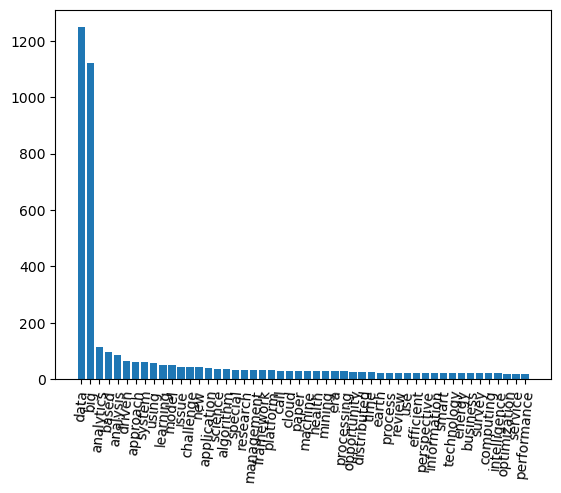

In [81]:
#히스토그램 그리기
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 85)
plt.show()

In [82]:
#3. 결과 시각화
#그래프 그리기
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()  #출판일 컬럼을 기준으로
summary_year

,출판일,doc_count
0,2003,1
1,2004,2
2,2006,1
3,2008,1
4,2009,1
5,2011,8
6,2012,18
7,2013,55
8,2014,121
9,2015,91


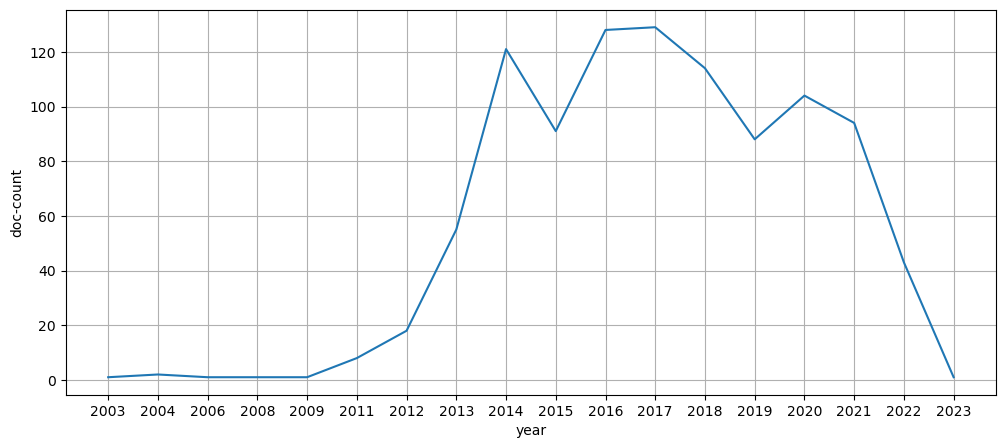

In [84]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

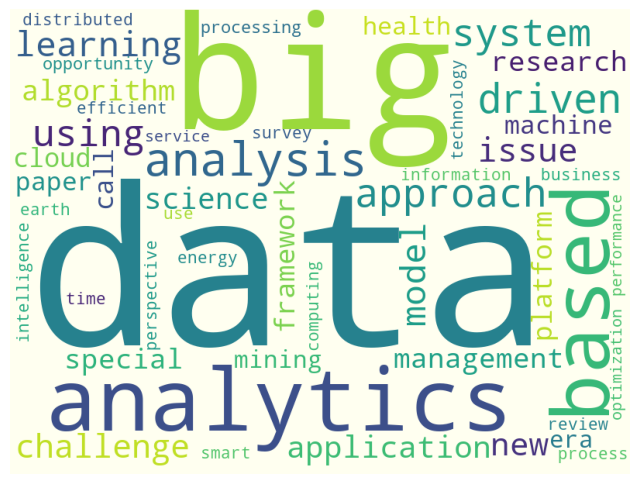

In [86]:
#워드클라우드 그리기
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [87]:
cloud.to_file('8_data/riss_bigdata_wordCloud.jpg')